# **speed** ***perception***  

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=ceb68c695d09f1db15db171659977da9be983966596bef19411c07f0eb75ccf4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


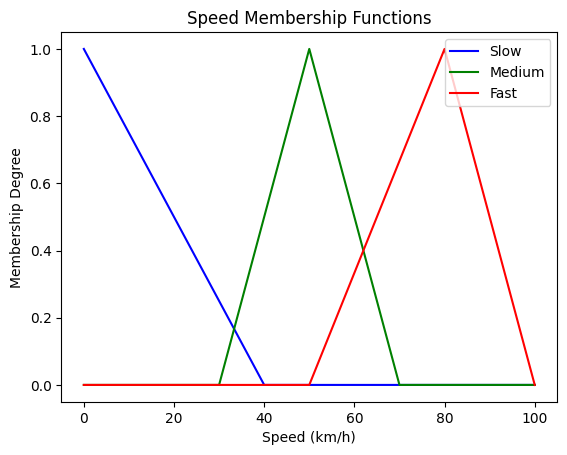

Input speed: 55 km/h
Action: 57.50 (0-50: Increase speed, 50-70: Maintain speed, 70-100: Decrease speed)


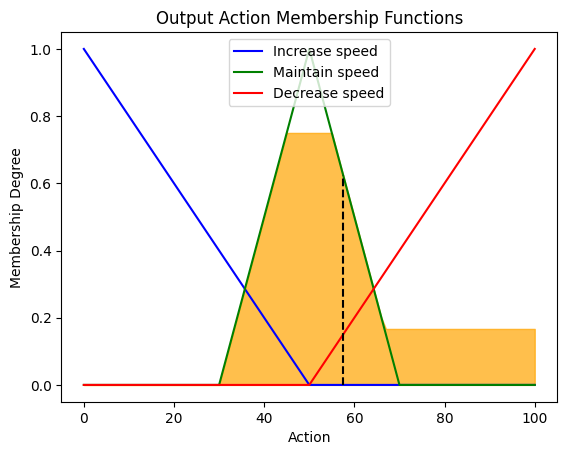

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x_speed = np.arange(0, 101, 1)


slow = fuzz.trimf(x_speed, [0, 0, 40])
medium = fuzz.trimf(x_speed, [30, 50, 70])
fast = fuzz.trimf(x_speed, [50, 80, 100])


plt.figure()
plt.plot(x_speed, slow, 'b', label='Slow')
plt.plot(x_speed, medium, 'g', label='Medium')
plt.plot(x_speed, fast, 'r', label='Fast')
plt.title('Speed Membership Functions')
plt.xlabel('Speed (km/h)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()


x_action = np.arange(0, 101, 1)
increase_speed = fuzz.trimf(x_action, [0, 0, 50])
maintain_speed = fuzz.trimf(x_action, [30, 50, 70])
decrease_speed = fuzz.trimf(x_action, [50, 100, 100])


input_speed = 55


speed_level_slow = fuzz.interp_membership(x_speed, slow, input_speed)
speed_level_medium = fuzz.interp_membership(x_speed, medium, input_speed)
speed_level_fast = fuzz.interp_membership(x_speed, fast, input_speed)

rule1 = np.fmin(speed_level_slow, increase_speed)
rule2 = np.fmin(speed_level_medium, maintain_speed)
rule3 = np.fmin(speed_level_fast, decrease_speed)


aggregated = np.fmax(rule1, np.fmax(rule2, rule3))


action = fuzz.defuzz(x_action, aggregated, 'centroid')
action_activation = fuzz.interp_membership(x_action, aggregated, action)


print(f"Input speed: {input_speed} km/h")
print(f"Action: {action:.2f} (0-50: Increase speed, 50-70: Maintain speed, 70-100: Decrease speed)")


plt.figure()
plt.plot(x_action, increase_speed, 'b', label='Increase speed')
plt.plot(x_action, maintain_speed, 'g', label='Maintain speed')
plt.plot(x_action, decrease_speed, 'r', label='Decrease speed')
plt.fill_between(x_action, 0, aggregated, color='orange', alpha=0.7)
plt.plot([action, action], [0, action_activation], 'k', linestyle='--', linewidth=1.5)
plt.title('Output Action Membership Functions')
plt.xlabel('Action')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()
